<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab2_Transformer/blob/main/Technion_ph_Transformer_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=42>Transformer Experiment </font>

Evgeny Kolonsky, adaptation from Hebrew to Colab

v.0.2.2 Oct 2022 - 2025

*Before reading the guide, be sure to understand the following terms:*

Farady's Law, Law of Lenz, Load, Equivalent Inhibition, Inductance, Electric Capacitance, Phasor.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

## Theory

### Introduction

According to Faraday’s Law, variability in time of the magnetic field through the coil, will result in the creation of an electrical current through the coil called induced EMF
$ \varepsilon = -N {d\Phi_B \over dt}$ where $N$ is the number of coil wrappings. Suppose the two coils wound on the same iron core. The coils are not connected in an electric manner, but are placed so that the magnetic field produced by each coil also goes through the other coil through the iron core (Figure 1). In order that the magnetic field be "imprisoned" in the core and pass into the air, the core material must have a very high level of magnetic permeability (and ideally, an infinite level of permeability). Iron is suitable for use as a core, since its magnetic permeability is $5,000 {𝜇N \over 𝐴^2}$.

When an AC source is connected to the first coil, an AC current will flow through it and will cause a time variable EMF. If both coils have a different number of turns, the flux causes a transformed voltage on the coils. This device is called a **transformer** (see Figure 2) because it changes the voltage in an electrical circuit. The coil connected to the power source is called a **primary coil** (primary) and $N_𝑃$ denotes its number of coil turns, and the **second coil** that is the “output” of the transformer is called secondary coil (secondary) and has $𝑁_𝑆$ coil turns.

<img src="hhttps://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f1.jpg"/>
<br>
Fig.1: Two coils wound on the same iron core

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f2.jpg"/>
<br>
Fig. 2: Schematic diagram of transformer.
The vertical lines between the coils indicate that
there is a resonance coupling between them (they share a flux).


### Ideal transformer without load:

Suppose there is no energy loss in the transformer. This transformer is called an **ideal transformer**. Look at the circuit in Figure 2. In Figure 2, we discern the relationship between the voltages $𝑉_p$ and $𝑉_s$ where an AC current $I$ flows in the first circuit. The induced voltage in the primary coil is:

$$ V_p = -N_p { d\Phi \over dt}
\tag{1}
$$

This is the magnetic flux produced in the primary coil. Assuming that there are no magnetic flux losses in the transition from primary to secondary, the same magnetic flux is incorporated in both the primary and secondary coils, so equation (1) can also be written for the secondary coil:
$$ V_s = -N_s { d\Phi \over dt} .
\tag{2}
$$

We divide equation (2) into equation (1) and get the relation:

$$
{ V_s \over V_p } = {N_s \over N_p}.
\tag{3}
$$

Note that if the number of windings in the secondary coil is smaller than the number of windings in the primary coil ($𝑁_s< 𝑁_p$), the induced voltage on the secondary coil is also smaller than the induced voltage on the primary coil. This is a **step down transformer** that lowers the voltage. Similarly, if $𝑁_s> 𝑁_p$ then we get a **step up transformer**.

It is customary to define the size $a={N_p \over N_s}$. This size is called the transformer ratio of the transformer, and it is customary to write the equation (3) as: ${ V_s \over V_p } = {1 \over a}$.

### Ideal transformer with load

Let us now look at an ideal transformer whose load $R_L$ (ohms only) is connected to its secondary coil, as shown in Figure 3.

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f3.jpg"/>
<br>
Figure 3: Ideal transformer with load.

The voltage ratio on the coils of the transformer will be obtained by the equation (3), but in this case there is also an electrical current in the secondary coil. We will denote this current as: $𝐼_s$ since this is an ideal transformer, it has no energy losses, so under the Energy Conservation Law, the power that enters is equal to the output power:
$$
V_p I_p = V_s I_s
\tag{4}
$$
From here: ${I_s \over I_p} = {V_p \over V_s}$ with this equation (3) we get:

$$
{I_s \over I_p} = {N_p \over N_s} = a
\tag{5}
$$


### Reflected impedance in an ideal transformer

As with any electric circuit we want to find the equivalent impedance of the circuit. Our aim is to express the transformer and the load connected to it as a single component with impedance $Z$ and then we can solve the transformer-containing circuit using the standard methods we know. Therefor we will build an equivalent circuit as in Figure 3, by denoting the transformer together with the connected load as impedance $𝑍_{𝑒𝑞}$ (Fig. 4).

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f4.jpg"/>
<br>
Figure 4: Circuit-equivalent to a transformer circuit with ideal load

Find: $𝑍_{𝑒𝑞}$ in: $𝑍_{𝑒𝑞} = {𝑉_𝑝 \over 𝐼_𝑝} ={ 𝑉_𝑠  {𝑁_𝑝 \over 𝑁_𝑠} \over 𝐼_s {𝑁_s\over 𝑁_𝑝}} = \left({𝑁_𝑝 \over 𝑁_𝑠}\right)^2
  \left({V_s \over I_s}\right) = \left({𝑁_𝑝\over 𝑁_𝑠}\right)^2 R_L $
 that is the impedence: $𝑍_{𝑒𝑞}$ is dependent on the number of in the two coils of the transformer and the load connected to it. In our case impedance $𝑍_{𝑒𝑞}$ is a resistor, because the load we connected to the transformer has a resistance of $R_L$ (the letter $L$ indicates "Load"). Note that the transformer does not alter its impedance characteristics, but only its value (induction load remains inductive, capacitive load remains capacitive).


In aggregate we obtained:
$$
\left| Z_{eq}\right| = R_{eq} = a^2 R_L
\tag{6}
$$

The Phase of the equivalent impedance:
$$
\varphi = 0 ^{\circ}.
$$

### Transformer as an Impedance Adapter:

One of the most common uses of the transformer is to increase the efficiency of transferring power from a power source to a load. Suppose we desire to obtain the maximum possible power which amplifies against internal resistance 𝑟 and can supply to a speaker with $𝑅_𝐿$ Resistance. The speaker will be connected to an amplifier via a transformer. The equivalent resistance is calculated for the transformer and speaker together: $𝑅_{𝑒𝑞}=𝑎^2 𝑅_L$. We obtained an equivalent circuit as shown in Figure 5. In this type of circuit, we obtain a maximum power of $𝑅_{𝑒𝑞}$ where $𝑟=𝑅_{𝑒𝑞}$. In order that this condition exist, a transformer with the appropriate ratio of bindings (a) is selected and maximum power is obtained for an equivalent Resistor $𝑅_{𝑒𝑞}$ ànd therefore for the speaker as well. The method of power supply is called **impedance coordination**.

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f5.jpg"/>
<br>
Figure 5: Twin-impedance circuit for amplifier problem with speaker

### Practical transformer (not ideal)

In practical transformers there are energy losses. For instance not all the power supplied to the primary coil passes to the secondary coil. We will try to construct a **transformation circuit** (an electrically equivalent circuit) which is composed of components that reflect the physical processes that occur in the practical transformer and the reason for power losses will be explained:

<ol type="a">
  
  <li>The coils that make up the transformer also contain the ohmic resistance (see the "AC" guide, pages 4-5) that causes the coil heating and energy leakage. These Resistances are denoted with $𝑅_𝑝$ for the primary coil and $𝑅_𝑠$ for the secondary coil .</li>

  <li>There is a leakage of magnetic flux in the coils of the transformer, for example, a small part of the flux passes through the air rather than the core of the coils (see Figure 6). This variability of leaking flux creates magnetic inductance. We will denote with $𝑋_𝑝$, $𝑋_𝑠$ the resultant reactance caused by the leakage of the flux in the primary and secondary coils respectively .</li>
  <li>Since the core material does not have infinite permeability, an electric current is required to create the main flux (Fig. 6). $𝑋_𝑀$ denotes the reactance responsible for the formation of the main flux in the transformer core as a result of the current in the primary coil .</li>

  <li>There are losses in the magnetic material of the core due to the losses of the *Hysteresis* and *Eddy currents*. These losses cause a warming of the core and an energy drain [1]. As we know, a component in which the electric current turns into heat is a Resistor (see AC / DC guide, page 4). $𝑅_𝐶$ denotes obtained Resistance due to transformer core losses.</li>
</ol>

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f6.jpg"/>
<br>
Figure 6: Flux leakage in the coils of a practical transformer

Now we will construct the transformation circuit of a non-ideal transformer with an  RL  load connected to it (see Figure 7). An explanation of how we chose the location of each element in the transformation circuit can be found in [2].

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f7.jpg"/>
<br>
Figure 7: Transformation circuit of real transformer with load $R_L$ The induced electric current in the primary circuit by the secondary circuit is denoted by $𝐼_𝑠^∗$ and the relation between it and the secondary circuit electric current $I_𝑠$ is given by equation (5), which is valid for the ideal transformer.

In the experiment we will find the values of the components in the transformation circuit of a real transformer. We will do this by performing two experiments: a **transformer experiment without load (disconnect / vacuum)** and a **short experiment**.




### Practical transformer without load

In a load-free transformer, $𝑅_𝐿$ is disconnected and therefore $𝐼_𝑠^∗ = 0$ (see Figure 7). The primary losses are in the core material and you can neglect the coil wire and leakage losses, that is, neglect the components $𝑅_𝑝$,$𝑋_𝑝$ vs. $𝑅_𝐶$,$𝑋_𝑀$. Additionally, the electric current $𝐼_0$ (in Figure 7), ìn the primary coil (transformer without load) has two components: the $𝐼_𝑀$ current that produces the magnetic flux at the transformer core and is in the same phase with the magnetic flux $\Phi$, and the $𝐼_𝐶$ current which causes losses in the transformer core and does not generate magnetic flux. This component is usually negligible, but can reach 10% or more, of the electric current, if there are defects in the transformer fabrication. A phasor diagram (an explanation of phasors can be found in the "alternating current" guide, page 3) of the currents is shown in Figure 8.

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f8.jpg"/>
<br>
Figure 8: Phasor diagram of the currents without load

Conditions:
$$
I_C = I_0 \cos\varphi
\tag{7}
$$

$$
I_M = I_0 \sin\varphi
\tag{8}
$$

$$
I_0 = \sqrt{I_C^2 + I_M^2}
\tag{9}
$$
According to our assumptions: $𝐼_𝑝 = 𝐼_0$. If we measure the size of this current and the angle $\varphi$ between the voltage and current in the primary coil, we can calculate the currents $𝐼_𝐶$,$𝐼_𝑀$ and then the components $𝑅_𝐶$,$𝑋_𝑀$ according to:

$$
R_C = {V_P \over I_C}
\tag{10}
$$

$$
X_M = {V_p \over I_M}.
\tag{11}
$$

### Practical transformer with load

If the transformer is loaded (connecting the rheostat to the secondary coil terminals as in Figure 3) then the flow diagram will change (see Figure 9). In the secondary coil, an electric current $𝐼_s$ will flow, which will alter the flux in the secondary coil, and as a result, there will also be flux in the primary coil. This electric current, will try under Lenz's law, to reduce the flux in the primary coil. Since the voltage at the input to the primary coil is constant (generator voltage), it will increase the current in the primary coil, according to the wrap ratio, so that it will reach the value of $𝐼_𝑠^∗$ (see explanation for Figure 7). The current in the primary coil $𝐼_𝑝$ will be the sum of two vectors: the current $𝐼_𝑠^∗$ and the current $𝐼_0$ (the current of a non-load transformer).

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f9.jpg"/>
<br>
Figure 9: Phasor diagram of the currents in a practical transformer with load

### A short experiment

In a short experiment, the secondary coil is shortened, for example, $𝑅_L=0$. In this `scenario, we get large currents $𝐼_𝑝$ and $𝐼_𝑠^∗$ as opposed to the $𝐼_0$ current. We can assume that $𝐼_𝑝= 𝐼_𝑠^∗ \gg 𝐼_0$ (see Figure 7). Therefore, we will ignore the components $𝑅_𝐶$,$𝑋_𝑀$ and find an imupedance equivalent to the circuit.

$$
Z = (R_p + i X_p) + (a^2 R_s + i a^2 X_s) = R + i X.
\tag{12}
$$
From here:
$$
\left|Z\right| = \sqrt{R^2+X^2} = {V_p \over I_p}.
$$
Therefore:
$$
X = \sqrt{\left|Z\right| - R^2}
,\qquad
R = {P \over I_p^2}
$$
Where $P$ is the power supply source. The coils of the transformer in the experiment are the same:, therefore:
$$
X_p = X_s, \qquad R_p = R_s.
\tag{13}
$$



### Autotransformer

Several coils can be placed on the same core, connect the coils together and get different voltages. The only requirement is that the electric current between the coils needs to connect, and not be missing. When there is one coil on the core (or coils connected between them so that there is an electrical contact between the primary and secondary coils) then the system is called a Autotransformer (see Figure 10). $𝑀$
is the connection point between the two coils.

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f10.jpg"/>
<br>
Figure 10: Autotransformer

Note that the equations which connect the voltage and current in primary and secondary coils do not change:
$$
{V_s \over V_p} = {N_s \over N_p}, \qquad {I_s \over I_p} = {N_p \over N_s}
$$
The great advantage of an Autotransformer is that it is less expensive compared to an ordinary transformer because it requires fewer copper wires for the coils and, its structure is simpler. Also, power losses in the Autotransformer are less than those in a normal transformer, for the same power.

The disadvantages of Autotransformers are:
<ol>
  
<li>The primary coil carries the currents of the primary and secondary coil and therefore the copper wires need to be thicker for a given power.</li>
 <li>Circuits are not electrically insulated.</li>
</ol>

A useful component called *Variac* is an Autotransformer with a $𝑀$ contact (Fig. 10) that slides along the coil and enables the selection of a desired output voltage, usually between $0$ and $𝑉_𝑝$.

<u>
**Note**: It is important to ensure that the common connection between the input and output will be "0" of the network and not on the "hot" side (220V) because it is dangerous!
</u>


##Preparation questions

### Question 1

A transformer has a primary coil with 1000 winds and secondary coil with 2000 winds. A voltage of 100V, 50Hz flows through the initial coil (input). What will be the voltage be on the second coil (output)? What is the output voltage if we invert the connections (input / output)?

#### Answer 1

In [2]:
#Answer here
Np = 1000
Ns = 2000
Vp = 100 # V
freq = 50 # Hz

a = Np / Ns
print('Transformer ratio: {}.'.format(a))
Vs = Vp /a
print('Voltage on the second coil: {}V'.format(Vs))
print('If we invert connections output will be: {}V'.format(Vp *a))

Transformer ratio: 0.5.
Voltage on the second coil: 200.0V
If we invert connections output will be: 50.0V


### Question 2

For the circuit in figure 3: $𝑉_𝑝=10𝑉$, $𝑅_𝐿=10\Omega$,  $𝑁_𝑝=140$, $𝑁_𝑠=42$. Find the $𝐼_𝑠$ current that flows through the $𝑅_𝐿$ load. Hint: Use Ohm Law for load and the equation (3).

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f3.jpg"/>

#### Answer 2

In [3]:
#Answer here
Vp = 10 #V
RL = 10 # Ohm
Np = 140
Ns = 42

a = Np / Ns
Vs = Vp /a
Is = Vs / RL
print('Transformer ratio: {:6.2}.'.format(a))
print('Voltage on the second coil Vs: {}V'.format(Vs))
print('Current on the second coil Is: {}A'.format(Is))


Transformer ratio:    3.3.
Voltage on the second coil Vs: 3.0V
Current on the second coil Is: 0.3A


### Question 3

Prove that for the circuit in Figure 5 we obtain maximum power on the resistor $𝑅_{𝑒𝑞}$ where $𝑟=𝑅_{𝑒𝑞}$. Hints: Find the expression of the power developing on the resistor $𝑅_{𝑒𝑞}$ using the parameters $𝑉_𝑝$, $𝑟$, $𝑅_{𝑒𝑞}$ , reduce the expression by $𝑅_{𝑒𝑞}$ and compare to 0.

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f5.jpg"/>

#### Answer 3

$$ P = I^2 R_{eq}, \qquad I = {V_p \over r + R_{eq}},$$
Therefore
$$ P = V_p^2 {R_{eq} \over (r+R_{eq})^2}
$$

Considering $P$ as a function of $R_{eq}$ with constant $V_p$ and $r$ we can found that maximum is achieved when $$R_{eq} = r.$$

### Question 4a

Prove that the average power developing on $Z$ in the circuit in Figure A is equal to $𝑃_{𝑎𝑣𝑔}={1\over 2} 𝑉_0 𝐼_0 \cos\varphi$. Note that $\varphi$ is the angle between the voltage and the current of the power source and is also the negative phase of impedance (see explanation in the Introduction to AC, pg 3). Use the formula: $𝑃_{𝑎𝑣𝑔} = {1\over 𝑇} \int_0^T{𝑉_𝑝 𝐼_𝑝 𝑑𝑡}$. What is the equation for power, if the RMS values of the voltage and current are in place of their amplitudes?

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/fA.jpg"/>
<br>
Figure A

#### Answer 4a

1) Integrate

2) $𝑃_{𝑎𝑣𝑔}= V I  \cos\varphi$, where $V$, $I$ - RMS values.

### Question 4b

What is the power that is developing on the $𝑋_𝑀$ coil and the $𝑅_𝐶$ resistor in the circuit in Figure B?

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/fB.jpg"/>
<br>
Figure B

#### Answer 4b

1. Power on $X_M$ coil is $P = 0$, since voltage and current are ortogonal.
2. Power on $R_C$ resistor $P = { V_p^2 \over R_C}$.

### Question 5

You want to connect with the help of a transformer an amplifier represented by a sine voltage source and internal resistance of $500\Omega$ to a speaker with input impedance of $4\Omega$. What should be the ratio of the transformer's winds to correlations impedances of the amplifier and the speaker (will give maximum power on the loudspeaker). Does the coil with the highest number of winds need connect to an amplifier or speaker?

#### Answer 5

To get maximum power on the speaker, the effictive resistanse $Z$ of the transformer should equals to internal resistance $r$, as shown in question (3).
Internal resistance $Z = a^2 R$, where $a$ - transform ratio, $R$ - speaker impedance.

The coil with the highest number of $N$ should be connected to the **amplifier**.

In [4]:
r = 500 # internal resistor
R = 4   # speaker
a = np.sqrt(r/R)
print('Transformer ratio: {:5.1f}.'.format(a)) # a > 1 - step down transformer


Transformer ratio:  11.2.


### Question 6

The amplifier in question 5 can provide $2W$ to the speaker when there is impedance coordination. Assuming that the transformer is ideal (without losses):

<ol type="a">
<li>What is the power wastage in resistance of the amplifier output with the speaker connected as in Question 5 ? </li>
<li>If a speaker with an impedance of $4\Omega$ is connected directly to the amplifier output (without transformer), what will be the output power (speaker power)? </li>
<li>Of all connections, which has the highest efficiency $\eta$ when efficiency is defined as $\eta = {\text{output power} \over \text{output power} + \text{losses}}?$ </li>
</ol>

#### Answer 6

<ol type="a">
<li>$P = I^2 r = I_s^2 R$ - the same power as on speaker</li>
<li>Voltage on amplifier $V=2 \sqrt{P r}$

Current on amplifier and on speaker $I = {V \over r+R}$

Power on speaker $P_L = I^2 R$

Therefore $P_L = P {4 r R\over (r+R)^2}$
</li>
<li>
The highest efficiency achieved when speaker connected over transformer (a)
</li>

</ol>

In [5]:
r = 500 # internal resistor
R = 4   # speaker
P = 2   # power on speaker
print('a. Power on amplifier: {:5.1f}W.'.format(P))
Pb = P * 4 *r * R / (r+R)/(r+R)
print('b. Power on amplifier: {:5.1f}W.'.format(Pb))


a. Power on amplifier:   2.0W.
b. Power on amplifier:   0.1W.


### Question 7

In a given non-load transformer experiment: $\varphi=70^\circ$,$V_p=2𝑉$, $I_p=0.1A$. Find the components: $X_M$, $R_C$

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f8.jpg" width=30%/>

#### Answer 7.

In [6]:
phi = 70 / 180 * np.pi # to radians
Vp = 2
Ip = 0.1

Ic = Ip * np.cos(phi)
Im = Ip * np.sin(phi)
Rc = Vp / Ic
Xm = Vp / Im
print('Rc: {:5.1f} Ohm.'.format(Rc))
print('Xm: {:5.1f} Ohm.'.format(Xm))


Rc:  58.5 Ohm.
Xm:  21.3 Ohm.


### Question 8.

In a short experiment $R_L=0$, the current in a circuit is large, therefore: $I_p = I_s \gg I_0$. Find the components $X_p$, $R_p$  in the Transformation circuit in Figure 7 if it is known that $I_P =0.5𝐴$, $V_p = 2V$ and the phase difference between them is $\varphi=35^\circ$ . The coils of the transformer in the experiment are the same.

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f7.jpg" width=50%/>

#### Answer 8.

$$
\qquad Z = {V_p \over I_p},
\qquad R_p = Z \cos\varphi,
\qquad X_p = Z \sin\varphi.
$$

In [7]:
Vp = 2
Ip = 0.5
phi = 35/180*np.pi

Rp = Vp/Ip * np.cos(phi)
Xp = Vp/Ip * np.sin(phi)

print('Rp: {:5.1f} Ohm.'.format(Rp))
print('Xp: {:5.1f} Ohm.'.format(Xp))

Rp:   3.3 Ohm.
Xp:   2.3 Ohm.


### Question 9.

A transformer is composed of a single primary coil and two secondary coils that are mounted on the core. How do we connect the terminals of the secondary coils in order to obtain their aggregate voltages as the “output” of the transformer (serial connection)?

### Question 10.

Can the transformer work in with DC? Explain.

### Question 11.

What is an Eddy current? How does it affect the transformer and how can it be reduced?

### Question 12.

What is the equation for efficiency if the input power and transformer losses are known? Use the formula in question 6.c, and the Law of Energy Conservation.

#### Answer 12.

Efficiency $\eta = {\text{input power} - \text{losses}\over \text{input power}}$

## Experiment

### Before and during the Experiment

Training on the Digital Scope is mandatory prior to commencing with the experiment.

### Safety rules while working at the transformer test station:

<font color=red>

1. Call the instructor to examine the circuit before turning on the power supply.
2. If, after turning on the power, the measuring instruments do not respond (show 0) or beep, turn the power off immediately.
3. When modifications are made to the circuit board, turn off the power, make the modifications, and only then turn on the power again .
4. The number of winds for the primary must be 140 for all the circuits (except for the section on conversion of impedances). Please do not reduce the number because this causes an increase in circuit current, and a current greater than 5A can cause damage to the equipment .

</font>

Before starting the experiment, the values of the inductance and resistance shown on the coils will be recorded, and the inductance of the coils will be measured during their placement on the core using an LCR meter. What creates the difference between values?


### Step 0. Write down nominals

In [8]:
# coil 1 inductance and resistance
# nominal values
R_nominal = 0.2 # Ohm
L_nominal = 0.6e-3 #H

### Non-load transformer measurements

For measuring the current, connect the wires to the multimeter only between the COM and 2/20A sockets.

### Step 1. Connect wires

Connect the circuit and multimeters to measure voltage and current in the primary coil and secondary coil as shown in Figure 11. Connect the scope to a circuit using two coaxial cables (see fig. 12).

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f11.jpg"/>
<br>
Figure 11: Electrical circuit for non-load transformer measurements, see explanation in section 1.

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f12.jpg"/>
<br>
Figure 12: Coaxial cables

<u> Explanation of measuring Channel 2 of the scope </u>: During the experiment, the phase difference between voltage and current in the primary coil will be measured, but the digital scope can only measure voltages in both channels and <u>not currents</u>. To measure the phase of the current, connect channel 2 of the Scope in parallel to the voltmeter which measures $I_p$ (see Figure 11). The voltmeter has a small internal resistance: ~ 0.1Ω and if the voltage is measured on the voltmeter, then this voltage will be proportional to the current, for example, it will have the same phase. In this manner, the phase of the current can be measured.

### Step 2. Fix ratio and change voltage

Measure the voltages $𝑉_𝑝$, $𝑉_𝑠$ and the $𝐼_𝑝$ current for all voltages of the generator between $2V$ to $14V$ for the number of winds in the primary coil 140 and in the secondary coil 140 winds.

**Important:**

* Wait 5 seconds or more until the reading of the multimeter stabilizes.
* The multimeter measures effective voltage and current (RMS), and not the amplitude. See an introduction to AC, explanation of the digital Scope).

Draw a graph of $𝑉_s$ as a function of $𝑉_𝑝$ and discuss the resulting gradient. Does it fit theory?

[46.67870396 46.87400301 46.04450209 48.1163155  49.78475007 49.53645897
 49.56187515]


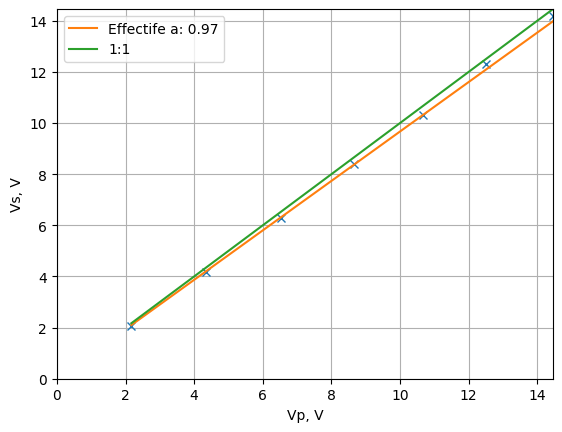

In [33]:
# measurements: each line a point Vp, Vs, Ip
measurements = '''
# Vp, Vs, Ip, phi
2.17 2.05 0.11 65
4.34 4.16 0.17 57
6.52 6.28 0.23 52
8.66 8.40 0.28 50
10.66 10.3 0.32 48
12.5 12.3 0.37 47
14.46 14.2 0.42 46
'''
Vp, Vs, Ip, phi = np.genfromtxt(measurements.splitlines(), dtype=float).T

a_eff = np.mean(Vs / Vp)

phi = phi / 180 * np.pi

Ic = Ip * np.cos(phi)
Im = Ip * np.sin(phi)
Rc = Vp / Ic
print(Rc)
Xm = Vp / Im

plt.plot(Vp, Vs, 'x')
plt.plot(Vp, a_eff * Vp , '-', label=f'Effectife a: {a_eff:.2f}')
plt.xlabel('Vp, V')
plt.plot(Vp, Vp, '-', label='1:1')
plt.ylabel('Vs, V')
plt.legend()
plt.xlim(0, np.max(Vp))
plt.ylim(0, np.max(Vp))
plt.grid()


In [11]:
print(Xm)

[21.76663713 30.44033348 35.97390766 40.37438259 44.82639031 46.19349531
 47.86134649]


### Step 3. Fix voltage, change ratio

Measure the voltages $𝑉_𝑝$, $𝑉_𝑠$ and the $𝐼_𝑝$ current for the voltage of the $10V$ generator. The number of winds in the primary coil 140, and the number of secondary coil winds: 14, 42, 84, 112, 140. Draw a graph of ${𝑉_𝑠 \over 𝑉_𝑝}$ as a function of ${𝑁_S \over 𝑁_𝑝}$. What can be deduced from the graph?

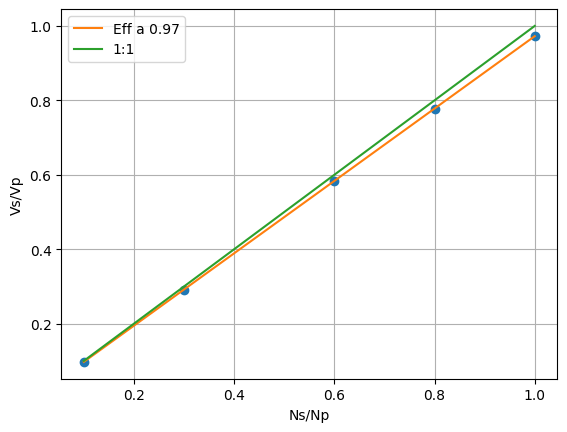

In [40]:
# measurements: each line a point Ns, Vp, Vs
measurements = '''
# Ns, Vp, Vs, Ip, phi
14 10.8 1.05 0.32 48
42 10.8 3.15 0.32 48
84 10.8 6.31 0.32 48
112 10.8 8.4 0.32 48
140 10.8 10.5 0.32 48
'''
Ns, Vp, Vs, _, _ = np.genfromtxt(measurements.splitlines(), dtype=float).T
Np = 140

plt.plot(Ns/Np, Vs / Vp, 'o')
plt.xlabel('Ns/Np')
plt.ylabel('Vs/Vp')

fit = polyfit( Ns/Np, Vs/ Vp, 1)
plt.plot(Ns/Np, fit[0] + fit[1] * Ns/Np, label=f'Eff a {fit[1]:.2f}')
plt.plot(Ns/Np,  Ns/Np, label=f'1:1')
plt.legend()
plt.grid()
a_eff  = fit[1]

### Measure phase difference in the primary circuit

### Step 4. Non-load

**Measure non-load phase difference (empty experiment)**: Adjust the generator <u>to 8V</u>. Make sure that the number of winds in the <u>primary and secondary coils is equal to 140</u>. Adjust the round switch of the multimeter to 2A or 20A, AC and the coupling of the two channels of the scope to DC. Measure the voltages $𝑉_𝑝$, $𝑉_𝑠$ the $𝐼_𝑝$ current and the phase difference between Channel 1 and Channel 2 of the scope (click the meas button and select the phase function). To reduce noise on Channel 2, press the Acquire key and select AcqMode (Averaging). From the measurement results, calculate the components $𝐼_𝑀$, $𝐼_𝐶$, $𝑅_𝐶$, $𝑋_𝑀$. It is then assumed that $I_0$ does not change as the result of a final load connection.

In [70]:
# measurements here
Vp = 8.676 # V
Vs = 8.41 # V
I0 = 0.279 # A
phi = 51 / 180 * np.pi # to radians

Ic = I0 * np.cos(phi)
Im = I0 * np.sin(phi)
Rc = Vp / Ic
Xm = Vp / Im
print('Ic: {:5.3f} A.'.format(Ic))
print('Im: {:5.3f} A.'.format(Im))
print('Rc: {:5.3f} Ohm.'.format(Rc))
print('Xm: {:5.3f} Ohm.'.format(Xm))


Ic: 0.176 A.
Im: 0.217 A.
Rc: 49.413 Ohm.
Xm: 40.014 Ohm.


### Step 5. Short

**Perform a Phase Difference Measurement with a short (short experiment)**: Adjust the generator <u><b>to 8V</b></u>. Ensure that the number of winds <u>in the primary and secondary coils is equal to 140</u>. Shorten the secondary coil of the transformer by connecting the terminals. Measure the $𝐼_p$ current, the $V_p$ voltage, and the phase difference between them (between channel 1 and channel 2 of the scope). From the measurement results, calculate the components $R_p$, $R_s$, $X_p$, $X_s$. Compare the measured coil resistance .

### A short experiment

In a short experiment, the secondary coil is shortened, for example, $𝑅_L=0$. In this `scenario, we get large currents $𝐼_𝑝$ and $𝐼_𝑠^∗$ as opposed to the $𝐼_0$ current. We can assume that $𝐼_𝑝= 𝐼_𝑠^∗ \gg 𝐼_0$ (see Figure 7). Therefore, we will ignore the components $𝑅_𝐶$,$𝑋_𝑀$ and find an imupedance equivalent to the circuit.

$$
Z = (R_p + i X_p) + (a^2 R_s + i a^2 X_s) = R + i X.
\tag{12}
$$
From here:
$$
\left|Z\right| = \sqrt{R^2+X^2} = {V_p \over I_p}.
$$
Therefore:
$$
X = \sqrt{Z^2 - R^2}
,\qquad
R = {P \over I_p^2}
$$
Where $P$ is the power supply source. The coils of the transformer in the experiment are the same:, therefore:
$$
X_p = X_s, \qquad R_p = R_s.
\tag{13}
$$


In [14]:
# measurements here
Vp = 8.43 # V
Ip = 3.8 # A
phi = 75 / 180 * np.pi

Z = Vp / Ip
P = Vp * Ip * np.cos(phi)
R = P / Ip / Ip
X = np.sqrt( Z*Z - R*R)
Rp = R / 2
Xp = Xp / 2

Rs = Rp
Xs = Xp

print('Rp = Rs: {:6.3f} Ohm.'.format(Rp))
print('Xp = Xs: {:6.3f} Ohm.'.format(Xp))

Rp = Rs:  0.287 Ohm.
Xp = Xs:  1.147 Ohm.


### Measurements in transformer with load in secondary coil

### Step 6. Load

Connect the circuit and multimeters to measure current and voltage in the primary coil and secondary coil as shown in Figure 13. Note that when the multimeter which measured $𝑉_𝑝$ then moves on to measure $𝐼_s$ adjust the rheostat to $10\Omega$ resistance. Measure the $R_L$ resistance precisely. The black multimeter may be used to measure the voltage $V_𝑝$. How should the multimeter be connected to measure this voltage?

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f13.jpg"  width=60%/>
<br>
Figure 13: Electrical circuit for the experiment of measuring the transformer with load in the secondary coil

In [15]:
# measurements here
RL = 9.54 # Ohm # at the end of measurements 9.99
Vp = 8.49 #V
Ip = 1.00 # A
Vs = 7.65 # V
phi = 29 # the phase diff between Vp and Ip gradually goes down from 60 to 40 and less (~1 degree per 6s)



### Step 7. Change voltage under load

Measure the currents $𝐼_𝑝$, $𝐼_𝑠$ for all voltages of the generator between $2V$ to $14V$ and for 140 winds in the primary coil and 14 winds in the secondary coil. Draw a graph of $𝐼_𝑠$ as a function of $𝐼_𝑝$ . What can be deduced from the graph?

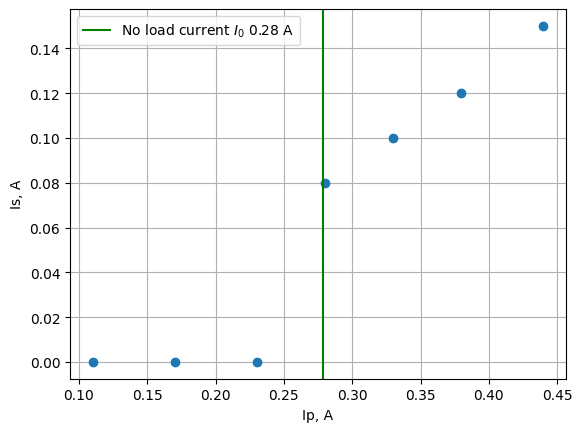

In [46]:
# measurements: each line a point Vp, Ip, Vs
RL = 8.9
measurements = '''
# Vp, Ip, Vs, Is, phi
2.17 0.11 0.19 0 64
4.34 0.17 0.39 0 56
6.46 0.23 0.59 0 51
8.66 0.28 0.78 0.08 48
10.82 0.33 0.98 0.10 46
13.0 0.38 1.18 0.12 45
15.0 0.44 1.38 0.15 44
'''
Vp, Ip, Vs, Is, phi = np.genfromtxt(measurements.splitlines(), dtype=float).T
Np = 140
Ns = 14
#Is = Vs / RL


plt.plot(Ip, Is, 'o')
plt.xlabel('Ip, A')
plt.ylabel('Is, A')
plt.grid()
plt.axvline(I0, color='green', label=rf'No load current $I_0$ {I0:.2f} A')
plt.legend()

### Step 8. Fix voltage, change ratio under load

Measure the $𝐼_𝑝$, $𝐼_𝑠$ currents for the primary coil voltage $𝑉_𝑝 = 10𝑉$ (measure the exact value), for 140 winds in the primary coil and the number of secondary coil winds: 14, 42, 84, 112, 140. Draw a graph of $𝐼_𝑠$ as a function of $𝑁_𝑠$. What does the slope mean? Does it fit the theory? (See Preparation Question 2).

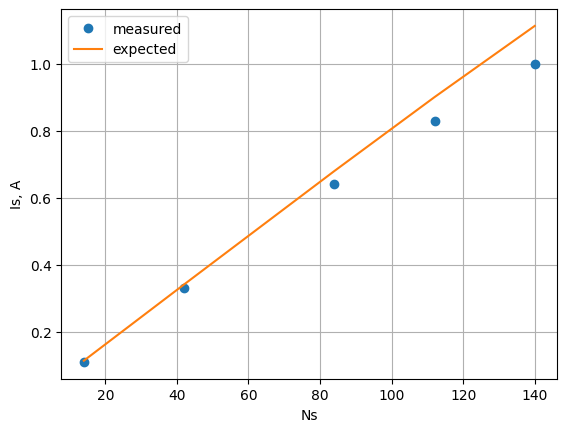

In [65]:
# measurements: each line a point Ns, Vp, Ip, Vs, Is
RL = 9.5 # Ohm
measurements = '''
# Ns, Vp, Ip, Vs, Is
14 10.8 0.34 1.05 0.11
42 10.8 0.39 3.11 0.33
84 10.76 0.63 6.0 0.64
112 10.69 0.91 7.85 0.83
140 10.57 1.24 9.4 1.0
'''
Ns, Vp, Ip, Vs, Is = np.genfromtxt(measurements.splitlines(), dtype=float).T
Np = 140
Vs_expected = Vp *  Ns / Np
Is_expected = Vs_expected / RL
plt.plot(Ns, Is, 'o')
plt.plot(Ns, Is_expected, '-')
plt.xlabel('Ns')
plt.ylabel('Is, A')
plt.legend(['measured', 'expected'])
plt.grid()

In [64]:
Vs_expected / Vs

array([1.02857143, 1.04180064, 1.076     , 1.08942675, 1.12446809])

### Step 9. Losses under load

**Measure the phase difference for final load**: <u>Adjust the generator to the 8V</u>, ensure that the number of winds in the <u>primary and secondary coils is equal to 140</u>. Turn the circular switch of the multimeter to 2A or 20A AC and the coupling of the two channels of the Scope DC. Measure the parameters $𝐼_𝑝$, $𝐼_𝑠$, $𝑉_𝑝$, $𝑉_𝑠$, $𝑅_𝐿$ and the phase difference between channel 1 and channel 2 of the Scope (VP can be measured using the Scope).

From the measurement and results of Section 4, calculate the $I_S^*$ component and compare to the $I_S$ which was measured directly. Calculate the power at the transformer input (see Preparation Question 4). Calculate the losses in the wires of the coils of the transformer core heating, and use this data to calculate the efficiency. Calculate the efficiency of the transformer in this state according to the power of the load and the input power, and compare (Preparation Questions 6,12).

In [75]:
# Measurements here
Ns = 140
Np = 140
Vp = 8.55
Ip = 1.09
Vs = 7.51
Is = 0.89
RL = 8.4
phi = 24.6 / 180 * np.pi
a = Np / Ns


ISS = Ip - I0
print('Secondary current calculated and measured', ISS, Is)

# Input power
Pp = Vp * Ip * np.cos(phi)

# Loss on 'no-load'. I0 and Rc are defined in 'no-load' experiment 4
Loss_noload = Vp**2 /  Rc

# Additional loss under load. Rp defined in 'short' experiment 5
Loss_p = Ip**2 * Rp
Loss_s = Is**2 * Rs

# Total loss
Loss = Loss_noload + Loss_p + Loss_s

eff1 = (Pp - Loss) / Pp
print('Efficiency', eff1)



Secondary current calculated and measured 0.811 0.89
Efficiency 0.7583211901178107


In [76]:
Pp = Vp * Ip *np.cos(phi)
Ps = Vs * Is
eff2 = Ps / Pp
print('Efficiency', eff2)

Efficiency 0.7887886560573131


### Measurements in a transformer as an impedance converter

### Step 10. Change load, measure output voltage and current

Set the number of winds in the primary coil to 84 and the secondary coil to 140. Set the generator to $2V$. Change the rheostatic resistance between $0$ to $10\Omega$ (at least 10 different points from the $R_L$ range) and measure the current and voltage in the secondary coil.

Text(0, 0.5, 'Is, A')

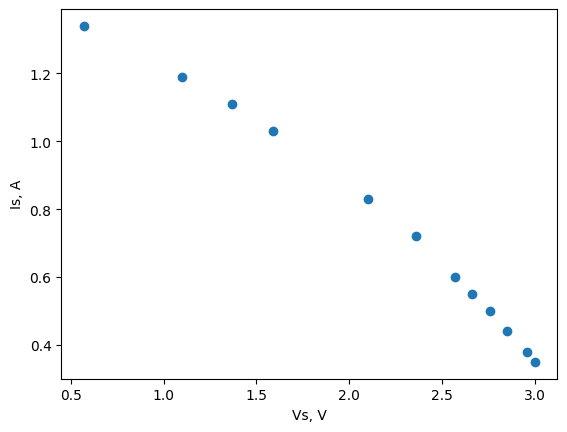

In [20]:
# measurements: each line a point Vs, Is
measurements = '''
3.00 0.35
2.96 0.38
2.85 0.44
2.76 0.50
2.66 0.55
2.57 0.60
2.36 0.72
2.10 0.83
0.57 1.34
1.10 1.19
1.37 1.11
1.59 1.03
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Vs, Is = data.T
Np = 84
Ns = 140
Vp = 2
a = Np/Ns

plt.plot(Vs, Is, 'o')
plt.xlabel('Vs, V')
plt.ylabel('Is, A')

### Step 11. Power under changing load

Draw a graph of the power $I_𝑠 𝑉_𝑠$ for $R_L$.  The rheostat resistance of the rheostat can be found according to $R_L = {𝑉_𝑠 \over 𝐼_𝑠}$. Determine for which $R_L$ value the maximum power is obtained for $R_L$. Add points on the graph to measure the precise maximum. What is the equivalent resistance ($R_E$ in Figure 4) that corresponds to the maximum power? What is the internal resistance of the generator used in the experiment?

Text(0, 0.5, 'Ps, W')

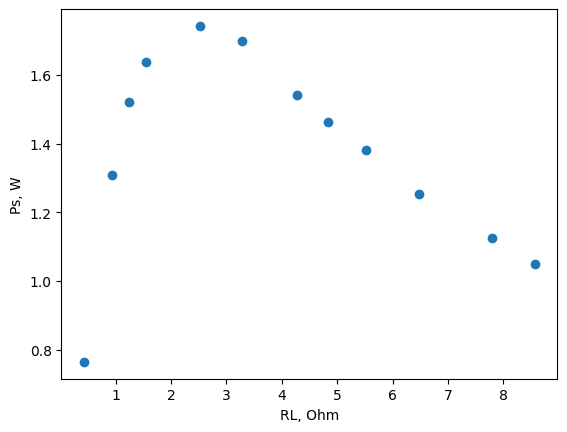

In [21]:
RL = Vs / Is
Ps = Vs * Is

plt.plot(RL, Ps, 'o')
plt.xlabel('RL, Ohm')
plt.ylabel('Ps, W')

# r = a^2 * RL_max

### Step 12. Autotransformer

Disconnect all wires and connect the transformer as an Autotransformer.
Use only one coil, see Figure 10. Connect two multimeters to measure
voltages $𝑉_p$, $𝑉_s$. Connect one voltmeter directly to the signal generator which is connected to the primary coil of 140 winds and a second voltmeter connect to the coil with 14 winds. Turn on $8V$ current in the generator, and measure the currents. Alter the number of winds of the secondary coil in the transformer to 42, 84, 112 and measure the voltages accordingly.

Draw a graph ${V_s \over V_p}$ as a function of ${N_s \over N_p}$.

Compare the result to the theoretical value.

<img src="https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Transformer/refs/heads/main/f10.jpg"/>

Text(0, 0.5, 'Vs/Vp, A')

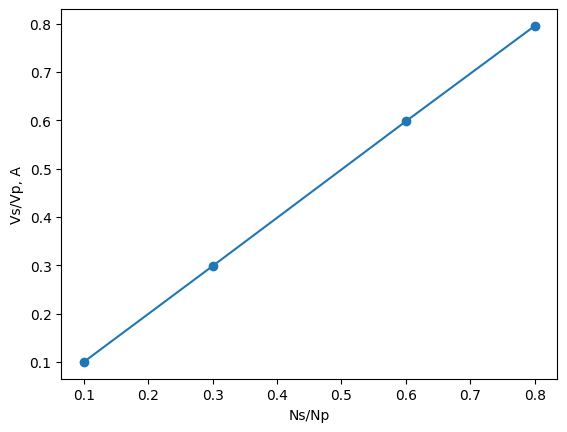

In [22]:
# measurements: each line a point Ns, Vp, Vs
measurements = '''
14 8.71 0.870
42 8.71 2.60
84 8.71 5.21
112 8.71 6.93
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Ns, Vp, Vs = data.T
Np = 140

plt.plot(Ns/Np, np.divide(Vs, Vp), '-o')
plt.xlabel('Ns/Np')
plt.ylabel('Vs/Vp, A')

## Conclusion

<u>Concepts, methods and instruments about which the the student learns, and knows how to use
after submitting the report on the subject:</u>

Faraday's law, Lenz’s Law, Load, Equivalent Inhibition, Inductance, Electric
Inductance, Transformer, Secondary Coil, Primary Coil, ideal transformer, step down
transformer, step up transformer, reflected impedance, transformation circuit,
equivalent circuit, impedance coordination, Hysteresis losses, Eddy currents ,
phasor, phasor diagrams, Autotransformer, Variac .

## Source list

[1] An explanation of the phenomena of Hysteresis losses and Eddy Currents
appears in the book :
Dr. David Almakis Energy conversion: transformers and electrical machinery Ministry of Education, Matach, pgs 63, 66-69.

[2] Locations of transformation circuit components of real transformer:
Dr. David Almakis Energy conversion: transformers and electrical machinery Ministry
of Education, Matach, pgs 48-50 .